# Important Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

# Load the dataset

In [2]:
data_file_path = "D:\\Abhay\\Housing Price data set.csv"
df = pd.read_csv(data_file_path)
df.drop(columns=['Unnamed: 0'], inplace=True)

# Identify and analyze 'lotsize' statistics

In [3]:
lotsize_min = df['lotsize'].min()
lotsize_max = df['lotsize'].max()
print(f"Minimum lotsize: {lotsize_min}")
print(f"Maximum lotsize: {lotsize_max}")

Minimum lotsize: 1650
Maximum lotsize: 16200


# Encode categorical columns using LabelEncoder

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Scale 'lotsize' using MinMaxScaler

In [5]:
scaler = MinMaxScaler()
df['lotsize'] = scaler.fit_transform(df[['lotsize']])

# Feature selection: Choose the top 10 features using SelectKBest and chi-squared

In [6]:
X = df.drop(columns=['price'])
Y = df['price']
feature_selector = SelectKBest(score_func=chi2, k=10)
feature_selector.fit(X, Y)
selected_features = X.columns[feature_selector.get_support()]
print(f"Top 10 features:\n{selected_features.tolist()}")

Top 10 features:
['bedrooms', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']


# Perform train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Hyperparameter tuning for the Linear Regression model

In [8]:
model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
model = LinearRegression(**best_params)

# Train the model

In [9]:
model.fit(X_train, y_train)

LinearRegression(positive=True)

# Make predictions

In [10]:
y_pred = model.predict(X_test)

# Cross-validation and R-squared scores

In [11]:
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
mean_r2_score = scores.mean()
print(f"Mean R-squared Score: {mean_r2_score:.4f}")

Mean R-squared Score: 0.5082


# Calculate and print regression metrics

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"Median Absolute Error: {medae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 11507.10
Mean Squared Error (MSE): 248591302.99
Root Mean Squared Error (RMSE): 15766.78
Mean Squared Log Error (MSLE): 0.0488
Median Absolute Error: 9323.30
R-squared (R²): 0.7081


# Generate a learning curve plot for a machine learning estimator.

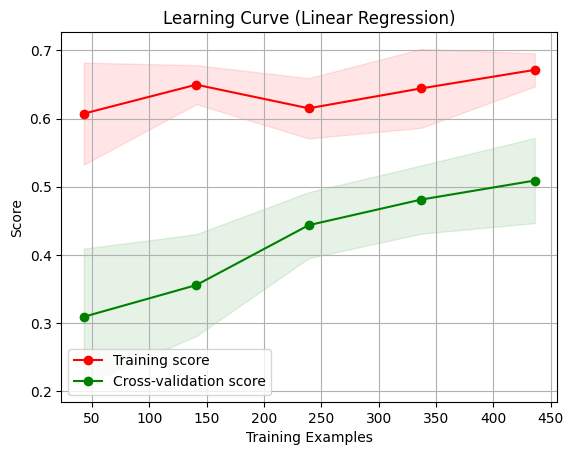

In [13]:
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate a learning curve plot for a machine learning estimator.

    Parameters:
    - estimator: The machine learning model to evaluate.
    - title: The title of the learning curve plot.
    - X: The feature matrix.
    - y: The target vector.
    - cv: Cross-validation strategy. (default: None)
    - train_sizes: Relative or absolute numbers of training examples. (default: np.linspace(0.1, 1.0, 5))

    Returns:
    - A learning curve plot.
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    
    if cv is not None:
        train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1)
    else:
        train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    
    return plt
# Plot the learning curve
plot_learning_curve(model, "Learning Curve (Linear Regression)", X, Y, cv=5)
plt.show()

# Save a trained machine learning model to a file using joblib.

In [14]:
import joblib

def save_model(model, model_filename):
    """
    Save a trained machine learning model to a file using joblib.

    Parameters:
    - model: The trained machine learning model to be saved.
    - model_filename: The filename for saving the model.

    Returns:
    - None
    """
    try:
        joblib.dump(model, model_filename)
        print(f"Model successfully saved as {model_filename}")
    except Exception as e:
        print(f"Error: Unable to save the model as {model_filename}")
        print(e)

# Specify the filename for saving the model
model_filename = 'House_prediction_model.pkl'

# Call the function to save the model
save_model(model, model_filename)